___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [27]:
df[df['Class']==1].head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [28]:
df['Class']

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

<Axes: xlabel='Class', ylabel='count'>

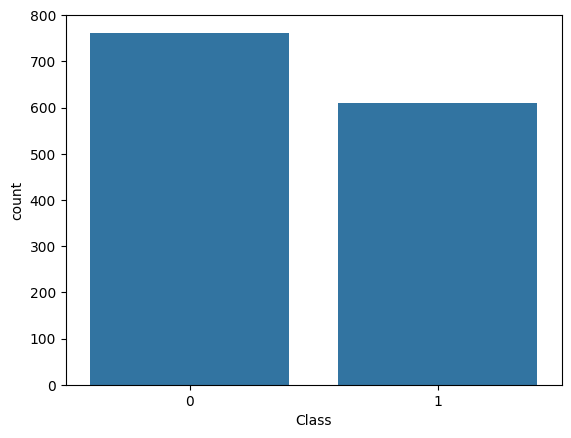

In [29]:
sns.countplot(x='Class',data=df)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

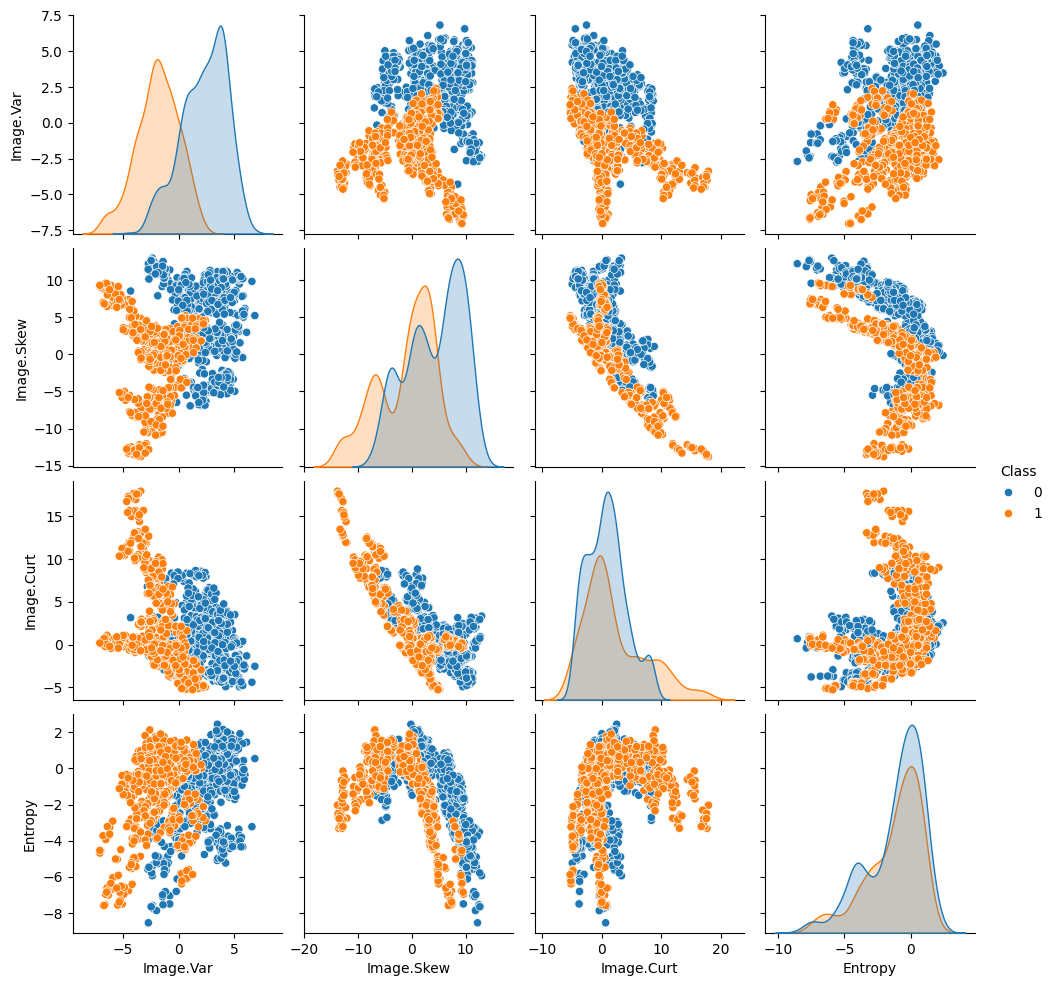

In [30]:
sns.pairplot(df,hue='Class')

In [31]:
df.isnull().sum()

Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [32]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [33]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [34]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [35]:
scaled_features=scaler.fit_transform(df.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [36]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [37]:
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [38]:
X = df_feat
y = df['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [41]:
y_test.shape

(412,)

# Tensorflow

In [42]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [43]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [44]:
image_var = tf.feature_column.numeric_column('Image.Var')
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column("Image.Curt")
entropy = tf.feature_column.numeric_column('Entropy')

In [45]:
feat_cols =[image_var,image_skew,image_curt,entropy]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [46]:
classifier=tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns
=feat_cols)

AttributeError: module 'tensorflow' has no attribute 'estimator'

** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

** Use the predict method from the classifier model to create predictions from X_test **

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=200)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [50]:
rfc_preds = rfc.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,rfc_preds))
print(confusion_matrix(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

[[234   4]
 [  0 174]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!

In [53]:
from sklearn.model_selection import Sequential

ImportError: cannot import name 'Sequential' from 'sklearn.model_selection' (c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\__init__.py)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()

In [56]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
X_train=np.array(X_train)
y_train = np.array(y_train)

In [63]:
X_train

array([[-1.35326278e-01,  7.19518228e-01,  8.93992201e-02,
         2.24033863e-01],
       [-6.33324606e-01, -2.96270757e-01, -1.14248994e-01,
         1.31996670e+00],
       [ 1.36894415e+00, -1.16004098e+00,  4.73016649e-01,
         2.92373433e-01],
       ...,
       [ 1.23004971e+00, -8.24617250e-01,  1.89226093e-01,
         7.14119001e-01],
       [-7.06238030e-01, -1.46372364e-01, -4.89721980e-01,
         1.68007128e-01],
       [-8.14910460e-02, -7.07889233e-04, -1.08633435e+00,
         2.73289966e-01]])

In [62]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.